In [4]:
##Requirements ML Linear Regression
##this script is to make a prediction on Studant performance
##using machine learning we can predict the effort of studant to 
##receive the better grade on the end the student's school year
##
##Author Diego A pereira
##
##for this script we will need install some packages
##-scikit-learn
##-matplotlib
##-pandas
## 
## You can download the dataset here: UCI DATA SET -> https://archive.ics.uci.edu/ml/datasets/Student+Performance 
## or use my sample on folder data_input
##requirements:
##Python3.10 or later.

##!pip install scikit-learn
##!pip install matplotlib
##!pip install pandas

## 1 -> Setup the packages and envoriments

In [5]:
#Set Pre-Packages 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

#setup the packages
from globals import py_path #pathactual of  jupyter if on collab or online jupyter comment this line.
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
import time

##SET STYLE:
style.use("ggplot")

#Set Folder input
folder_data_input = py_path +'\data_input'

#Set folder Destine
folder_destine = py_path +'\results'

## 2 -> Preparing the Data for Prediction Proposal:

In [6]:
# reading file
data_Mat = pd.read_csv(folder_data_input + "\pdt_student_mat.csv", delimiter=',')

# Checking first five lines
data_Mat.head(5)

#Checking all coluns available:
data_Mat.columns

data_Mat = shuffle(data_Mat) # Optional - shuffle the data

#pre-processing training - separated data:
predict = "G3"

X = np.array(data_Mat.drop([predict], 1)) # Features
y = np.array(data_Mat[predict]) # Labels

##Afert completed the data will be ready for next step, we will predict the G3 last grade for studant.

## 3 -> Preparing the Model - LINEAR REGRESSION

In [7]:
##Split data size to training:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

# LOAD MODEL
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

## Now that model is ready and saved on file pickle we can start some testes:

Accuracy: 0.7332516943713099
Accuracy: 0.9187402120139081
Accuracy: 0.8340590576189738
Accuracy: 0.8028074771914112
Accuracy: 0.790788196243037
Accuracy: 0.832887598059004
Accuracy: 0.7403511293110091
Accuracy: 0.7975771713797215
Accuracy: 0.6937412879564279
Accuracy: 0.830184084411954
Accuracy: 0.8575477502533805
Accuracy: 0.8898860131500372
Accuracy: 0.8471302258967639
Accuracy: 0.7583132094248688
Accuracy: 0.7717794896609929
Accuracy: 0.8951310607466516
Accuracy: 0.8749945348093965
Accuracy: 0.8627614161262162
Accuracy: 0.8127897833113472
Accuracy: 0.9309852844821606


## 4 - Starting loading and Test the model LINEAR REGRESSION

In [8]:
# LOAD MODEL
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

##Show the Coefficient and Intercept
print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")


-------------------------
Coefficient: 
 [-0.17726372  0.17323237  0.96633045 -0.17507172  0.12200144 -0.20487042
  0.04398777]
Intercept: 
 0.884557092759712
-------------------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


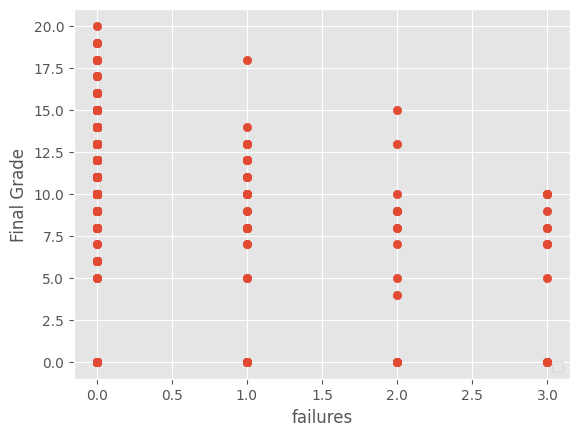

,Predicted,X_test,Y_test
0,9.411314,"[16, 8, 10, 2, 4, 0, 4]",9
1,19.347306,"[16, 18, 18, 1, 5, 0, 8]",18
2,6.914149,"[18, 8, 8, 2, 3, 0, 2]",8
3,8.528401,"[16, 10, 9, 3, 4, 0, 2]",9
4,3.141178,"[18, 6, 5, 1, 3, 3, 0]",0
5,4.792885,"[17, 6, 5, 1, 5, 0, 14]",5
6,6.223508,"[15, 7, 7, 2, 4, 1, 2]",7
7,8.142115,"[16, 10, 8, 1, 3, 0, 10]",9
8,4.185705,"[18, 6, 5, 1, 4, 0, 7]",6
9,11.710797,"[15, 10, 12, 1, 2, 0, 2]",12


In [9]:
predicted= linear.predict(x_test)
#for x in range(len(predicted)):
#    print(predicted[x], x_test[x], y_test[x])

dfpredicted = pd.DataFrame(predicted, columns = ['Predicted'])
dfx_test = pd.DataFrame([[x] for x in x_test ], columns = ['X_test'])
dfy_test = pd.DataFrame(y_test, columns = ['Y_test'])
df_test_final = pd.concat([dfpredicted,dfx_test, dfy_test],axis=1)


# Drawing and plotting model
plot = "failures"
plt.scatter(data_Mat[plot], data_Mat["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()


df_test_final

## 5 - Predict on Real Case!

In [10]:
def insert_data():
    print('please use whole numbers to answer the questions"\n Press enter to move to next question!')
    age=input("What is your age?\n")
    G1=input("What is your grade G1?\n")
    G2=input("What is your grade G2?\n")
    studytime=input("how mach time you spend studying ? ex. 2\n")
    freetime=input("how mach time you spend in your free time ? ex. 2\n")
    failures=input("how many failures you have ? ex. 2\n")
    absences=input("how many absences you have ? ex. 2\n")

    d = {'age': [age], 'G1': [G1],'G2': [G2], 'studytime': [studytime],'freetime': [freetime], 'failures': [failures],'absences': [absences]}
    df = pd.DataFrame(data=d)
    values_prediction = shuffle(df)

    return values_prediction

def start_prediction(values_prediction):
    predicted= linear.predict(values_prediction)
    #print(f"predictions G3 is: {predicted}")
            
    return predicted[0]

In [21]:
## prompt command to imput variables for prediction:
loop = True
while loop:
    #print(menu)
    player_action = input("Welcome to Predict Studant! Please Select one option to Start!  \n\n 1- Insert data \n 2- Start prediction\n 3- Exit Application\n\n")

    if player_action == '1':
        values_prediction = insert_data()
        print("data insert Completed!")
        time.sleep(5)

    elif player_action == '2':
        Grade_3 = start_prediction(values_prediction)
        print("\nPrediction is running!\n")
        time.sleep(3)
        print(f"predictions G3 is: {Grade_3:.2}\n") 
        print(f"Accuracy: {acc:.2%} \n\n")
        time.sleep(5)
        print("Prediction Completed!\n\n")      

    elif player_action == '3':
        loop = False
        print('Application Closed!')

    else:
        print("Please Select one option to Start")

Welcome to Predict Studant! Please Select one option to Start!  

 1- Insert data 
 2- Start prediction
 3- Exit Application

1
please use whole numbers to answer the questions"
 Press enter to move to next question!
What is your age?
18
What is your grade G1?
12
What is your grade G2?
10
how mach time you spend studying ? ex. 2
5
how mach time you spend in your free time ? ex. 2
2
how many failures you have ? ex. 2
0
how many absences you have ? ex. 2
2
data insert Completed!
Welcome to Predict Studant! Please Select one option to Start!  

 1- Insert data 
 2- Start prediction
 3- Exit Application

2

Prediction is running!

predictions G3 is: 8.9

Accuracy: 93.10% 


Prediction Completed!


Welcome to Predict Studant! Please Select one option to Start!  

 1- Insert data 
 2- Start prediction
 3- Exit Application

3
Application Closed!
